In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.drop(columns = ['TotalCharges'], inplace = True)

In [8]:
x = data.iloc[:,1:19]

In [9]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


In [10]:
y = data.iloc[:,19]

In [11]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [12]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [13]:
nom_col = [0,6,7,9,10,16]
ordi_col = [1,2,3,5,8,9,11,12,13,14,15]

In [14]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse=False),nom_col),
                                (OrdinalEncoder(),ordi_col),remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [0, 6, 7, 9, 10, 16]),
                                ('ordinalencoder', OrdinalEncoder(),
                                 [1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 15])])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35)

In [16]:
x_train.shape

(4577, 18)

In [17]:
y_train.shape

(4577,)

In [18]:
x_test.shape

(2466, 18)

In [19]:
y_test.shape

(2466,)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
model = KNeighborsClassifier(9)

pipe = make_pipeline(trans,model)

In [21]:
model

KNeighborsClassifier(n_neighbors=9)

In [22]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [23]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
5264,Male,1,Yes,No,69,No,No phone service,DSL,No,No,Yes,No,No,No,One year,Yes,Credit card (automatic),29.80
3417,Female,0,Yes,Yes,8,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),56.30
1846,Male,0,No,No,19,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80
4402,Male,0,No,No,39,No,No phone service,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),48.95
205,Female,0,No,No,33,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),79.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936,Female,0,Yes,Yes,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.95
3226,Male,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.75
6819,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.80
224,Female,0,No,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.35


In [24]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [25]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
6693,Female,0,No,No,25,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.25
6392,Female,0,Yes,Yes,60,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,49.75
5406,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Electronic check,97.20
1135,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.65
2052,Female,0,No,No,48,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.85


In [26]:
y_test.head()

6693    No
6392    No
5406    No
1135    No
2052    No
Name: Churn, dtype: object

In [27]:
pred = pipe.predict(x_test)
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
accuracy_score(pred,y_test)*100

78.18329278183292

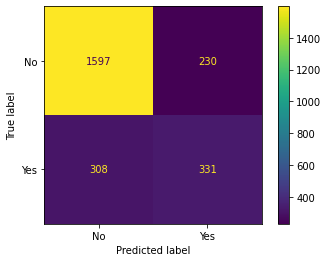

In [29]:
import matplotlib as plt
plot_confusion_matrix(pipe,x_test,y_test)

In [30]:
y.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

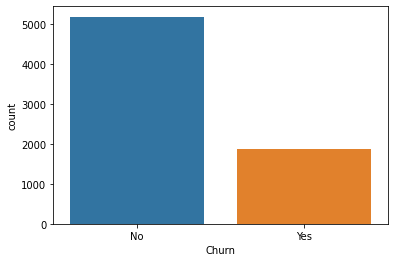

In [31]:
import seaborn as sns
sns.countplot(y)

In [32]:
from imblearn.under_sampling import RandomUnderSampler

under= RandomUnderSampler()

u_x, u_y = under.fit_resample(x,y)

u_y.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

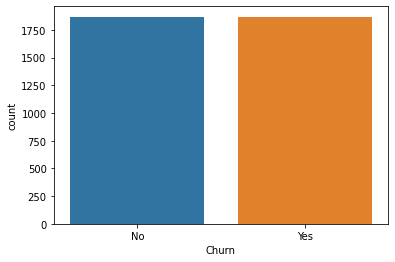

In [33]:
import seaborn as sns
sns.countplot(u_y)

In [34]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

over= RandomOverSampler()

o_x, o_y = over.fit_resample(x,y)

o_y.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [35]:
o_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [36]:
from imblearn.pipeline import make_pipeline

s =SMOTE()

n_pipe = make_pipeline(trans, s, model)

n_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [37]:
n_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [38]:
pred = n_pipe.predict(x_test)
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
accuracy_score(pred,y_test)*100

70.60016220600163

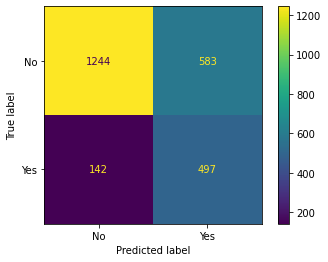

In [40]:
import matplotlib as plt
plot_confusion_matrix(n_pipe,x_test,y_test)

In [42]:
from sklearn.linear_model import LogisticRegression as lr
model_2 =lr(solver='liblinear')
pipe_2 = make_pipeline(trans,model_2)
pipe_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [45]:
pipe_2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [46]:
pred_1 = pipe_2.predict(x_test)
pred_1

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [47]:
accuracy_score(pred_1,y_test)*100

80.04866180048663